# **Exercise**

### 1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and height features. Drop other two features for simplicity.  

### 2. Figure out if any preprocessing such as scaling would help here.  

### 3. Draw elbow plot and from that figure out optimal value of **k**.

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
iris = load_iris()
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [11]:
df = df.drop(columns = ['sepal length (cm)', 'sepal width (cm)'])
df.head

<bound method NDFrame.head of      petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]>

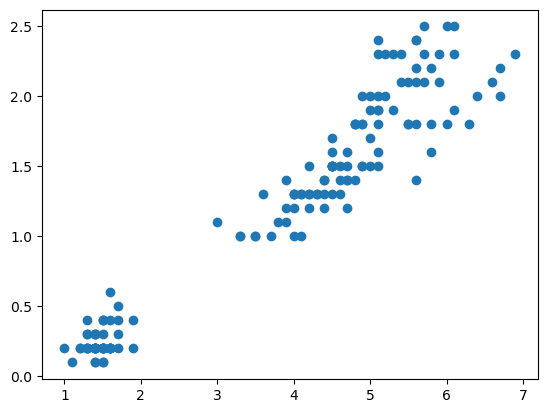

In [15]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [16]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(n_clusters = 2)

In [29]:
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
df['cluster'] = y_predicted
df.head

<bound method NDFrame.head of      petal length (cm)  petal width (cm)  cluster
0                  1.4               0.2        1
1                  1.4               0.2        1
2                  1.3               0.2        1
3                  1.5               0.2        1
4                  1.4               0.2        1
..                 ...               ...      ...
145                5.2               2.3        0
146                5.0               1.9        0
147                5.2               2.0        0
148                5.4               2.3        0
149                5.1               1.8        0

[150 rows x 3 columns]>

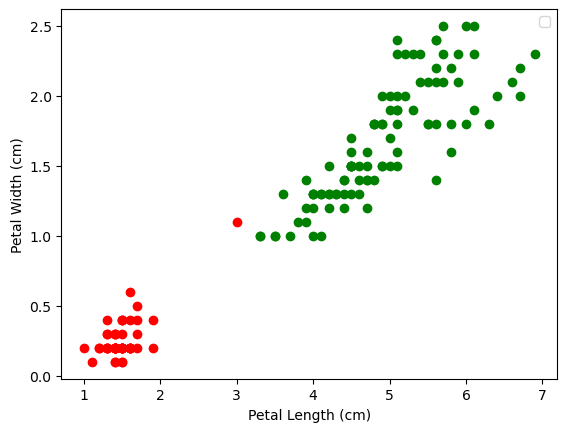

In [31]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [32]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

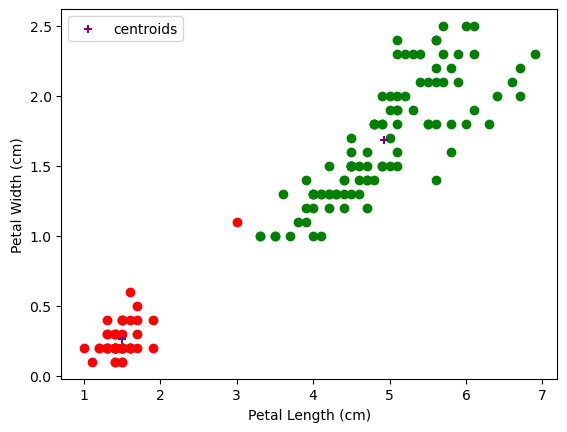

In [33]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroids')  #showing centroids on graph
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [22]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

In [23]:
sse

[550.8953333333334,
 86.39021984551397,
 31.412885668276978,
 19.503256907603895,
 14.194307692307692,
 11.051428739411808,
 9.30711000403106,
 9.068200554805818,
 6.8885992438933625]

Text(0, 0.5, 'SSE')

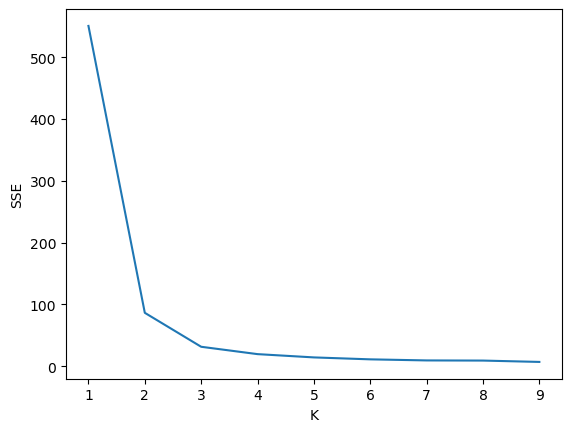

In [24]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')